# Исследование объявлений о продаже квартир



# Введение:

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.


# Цель исследования:

Провести исследовательский анализ данных и установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

# Ход исследования:

1. Изучить общую информацию
2. Выполнить предобработку данных
3. Добавить в таблицу новые столбцы:
      - цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
      - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
      - месяц публикации объявления;
      - год публикации объявления;
      - тип этажа квартиры (значения — «‎первый», «последний», «другой»);
      - расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).    
4. Провести исследовательский анализ данных
5. Написать общий вывод

### Откроем файл с данными и изучим общую информацию

#### Импортируем библиотеку pandas

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

#### Выведем первые 20 строчек датафрейма `data` на экран.

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Выведем основную информацию о датафрейме с помощью метода `info()`.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Найдем явные дубликаты

In [5]:
data.duplicated().sum()

0

#### Построим гистограмму для всех числовых столбцов таблицы на одном графике.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

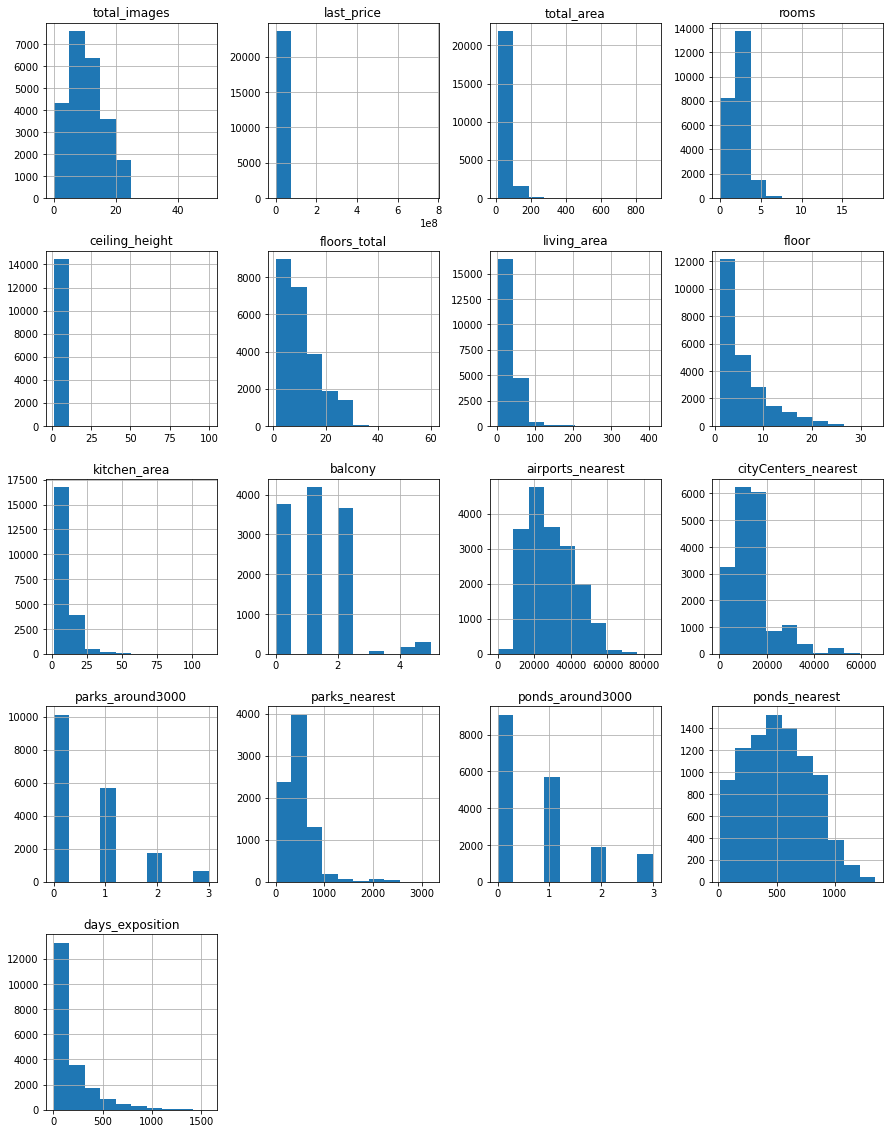

In [6]:
data.hist(figsize=(15, 20))

**Промежуточный вывод на основе изученной общей информации:**
<p></p>

<div style="border:solid green 2px; padding: 20px">

1. Таблица состоит из 23699 записей.
2. Явных дубликатов не найдено.
3. Обнаружены пропуски.
4. Есть некорректные типы данных.
5. По гистограммам видно, что есть аномальные значения.
    
</div>

### Выполним предобработку данных

#### Найдем количество пропущенных значений в каждом столбце.

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Переименуем столбцы.

In [8]:
# Переименуем столбец cityCenters_nearest в city_centers_nearest:      
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

#### Заменим пропуски на логические значения.

In [9]:
# Заменим пропуски у столбца "ceiling_height" на медианное значение:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

**living_area** - жилая площадь, она равна living_area = total_area(общая площадь) - площадь кухни(kitchen_area) - площадь балкона - площадь ванны - площадь коридора и другие дополнительные комнаты. Данных для нахождения жилой площади недостаточно, поэтому оставим данные без изменения.

In [10]:
# Заменим пропуски у столбца "floors_total" на медианное значение:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

In [11]:
# Заменим пропуски у столбца "is_apartment" на bool значение:
# Сначала найдем среднее значение апартаментов
data['is_apartment'].mean()

0.018018018018018018

In [12]:
# 2 % апартаментов указано в записях, следовательно в остальных случаях их просто не указали
data['is_apartment'] = data['is_apartment'].fillna(False)

In [13]:
# большинство квартир не имееют кухню, так как имеют студию или н-р, евродвушку(гостиная вместе с кухней)
# поэтому примем пропущенные значение для kitchen_area 0:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

In [14]:
# не во всех квартирах есть балконы, поэтому примем пропущенные значения:
data['balcony'] = data['balcony'].fillna(0)

In [15]:
# Посмотрим на отсортированный и уникальный список столбца locality_name 
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [16]:
# Приведем столбец locality_name к одному регистру и устраним неявные дубликаты
data['locality_name'] = data['locality_name'].str.lower()

In [17]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок ', 'деревня ', 'коттеджный поселок ',
             'поселок ', 'поселок городского типа ', 'посёлок при железнодорожной станции ',
             'садоводческое некоммерческое товарищество ','садовое товарищество ',
             'село ', 'при железнодорожной станции ', 'городского типа ', 'станции '], '', regex=True)
) 


In [18]:
data['locality_name'].sort_values().unique()

array(['агалатово', 'александровская', 'алексеевка', 'аннино', 'аро',
       'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров',
       'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь',
       'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'вещево',
       'виллози', 'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево',
       'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово',
       'дзержинского', 'дружная горка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жилгородок', 'жилпоселок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зимитицы', 'ивангород', 'извара'

In [19]:
# Заменим NaN на unknown:
data['locality_name'] = data['locality_name'].fillna('unknown')

Не во всех городах и поселках есть аэропорты, поэтому **airports_nearest** оставим без изменений.

Перечисленные населенные пункты не все являются городами и поэтому они не имеют центр города, **city_centers_nearest** оставим без изменений.


In [20]:
# ponds_around3000 и parks_around3000 это водоемы и парки в радиусе 3 км, 
# не во всех городах, поселках и другие населенных пунктов есть водоемв и парки, поэтому заменим пропущенные значения на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)


In [21]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

**parks_nearest** и **ponds_nearest** как и сказано выше, что не во всех населенных пунктах есть водоемы и парки, поэтому оставим их без изменений.

**days_exposition** - сколько дней было размещено объявление (от публикации до снятия), возможно пропуски обозначают, что квартира еще не продана, поэтому в этом столбце есть пропуски. Оставим без изменений.

In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Сократили пропуски, теперь необходимо заменить некорректные типы данных**

####  Заменим некорректные типы данных:

In [23]:
# Заменим некорректные типы данных is_apartment на булевое значение:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [24]:
# Заменим некорректные типы данных floors_total на целое значение, так как этажи кратные целому числу:
data['floors_total'] = data['floors_total'].astype('int')

In [25]:
# Заменим некорректные типы данных ponds_around3000 на целое значение, так как число водоемов может быть только целым числом:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [26]:
# Заменим некорректные типы данных parks_around3000 на целое значение, так как число парков может быть только целым числом:
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [27]:
# Приведем к корректному формату first_day_exposition:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [28]:
# Заменим некорректные типы данных last_price на целое значение, так как значения в таблице имеют целое значение:
data['last_price'] = data['last_price'].astype('int')

In [29]:
# Заменим некорректные типы данных balcony на целое значение, так как число балконов кратно целому числу:
data['balcony'] = data['balcony'].astype('int')

#### Проверим, как выглядит таблица после обновления тип данных и замены пропусков：

In [30]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,11.00,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,0.00,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,9.10,0,янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,14.40,1,парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,18.90,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,8.81,0,мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

### Добавим в таблицу новые столбцы

In [32]:
# Создадим столбец - цена одного квадратного метра:
data['price_of_one_square_meter'] = (data['last_price'] / data['total_area']).round(2)

In [33]:
# Создадим столбец - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее):
data['weekday'] = data['first_day_exposition'].dt.weekday   

In [34]:
# Создадим столбец - месяц публикации объявления:
data['month'] = data['first_day_exposition'].dt.month   

In [35]:
# Создадим столбец - год публикации объявления:
data['year'] = data['first_day_exposition'].dt.year

In [36]:
# Создадим столбец - тип этажа квартиры (значения — «первый», «последний», «другой»):
def floor(i):
    if i['floor'] == 1:
        return 'первый'
    if i['floor'] == i['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor, axis=1)   

In [37]:
# Создадим столбец - расстояние до центра города в километрах (переведем из м в км и округлим до ближайших целых значений):
data['distance'] = (data['city_centers_nearest'] / 1000).round(0)

#### Проверим, верно ли создались наши новые столбцы:

In [38]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_one_square_meter,weekday,month,year,floor_type,distance
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               23699 non-null  int64         
 1   last_price                 23699 non-null  int64         
 2   total_area                 23699 non-null  float64       
 3   first_day_exposition       23699 non-null  datetime64[ns]
 4   rooms                      23699 non-null  int64         
 5   ceiling_height             23699 non-null  float64       
 6   floors_total               23699 non-null  int64         
 7   living_area                21796 non-null  float64       
 8   floor                      23699 non-null  int64         
 9   is_apartment               23699 non-null  bool          
 10  studio                     23699 non-null  bool          
 11  open_plan                  23699 non-null  bool          
 12  kitc

**Вывод:**
<p></p>

<div style="border:solid green 2px; padding: 10px">

1. Переименовали столбец cityCenters_nearest в city_centers_nearest.
2. Заменили пропуски в таблице на логические значения.
3. Устранили неявные дубликаты у столбца locality_name.
4. Заменили некорректные типы данных на корректные.
5. Добавили новые столбцы:
    - **price_of_one_square_meter** - цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
    - **weekday** - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
    - **month** - месяц публикации объявления;
    - **year** - год публикации объявления;
    - **floor_type** - тип этажа квартиры (значения — «‎первый», «последний», «другой»);
    - **distance** - расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

    
</div>

### Проведем исследовательский анализ данных

#### Изучим перечисленные ниже параметры объектов:

##### Изучим параметр total_area - общая площадь:

In [40]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

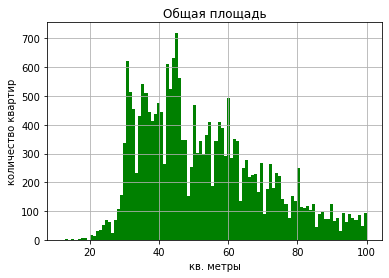

In [41]:
data['total_area'].plot(title = 'Общая площадь', kind = 'hist', bins=100, grid = True, range=(12,100), color = 'green')
plt.xlabel('кв. метры')
plt.ylabel('количество квартир')
plt.show() 


**Вывод:**
По изученным данным можно увидеть, что большинство квартир с общей площадью от 40 до 69 кв. метров имеют большее количество публикаций, с площадью 52 кв. метра максимальное количество. 

##### Изучим параметр living_area - жилая площадь:

In [42]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

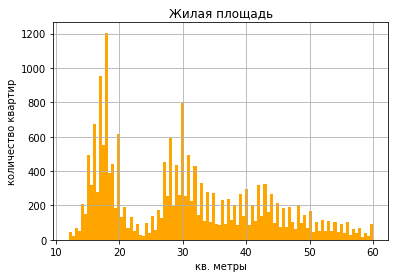

In [43]:
data['living_area'].plot(title = 'Жилая площадь', kind = 'hist', bins=100, grid = True, range=(12,60), color = 'orange')
plt.xlabel('кв. метры')
plt.ylabel('количество квартир')
plt.show()

**Вывод:**
По изученным данным можно увидеть, что с жилой площадью около 18 и 30 кв. метров имеют большее количество публикаций, около 24 кв. метров имеется спад. Квартиры с 18 кв. метров имеют максимальное количество публикаций.

##### Изучим параметр kitchen_area - площадь кухни:

In [44]:
data['kitchen_area'].describe()

count    23699.000000
mean         9.553814
std          6.420973
min          0.000000
25%          6.300000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

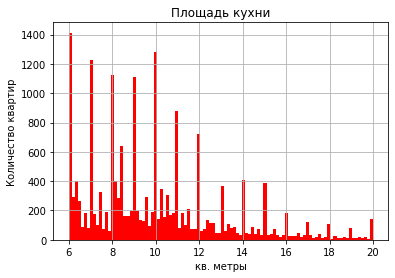

In [45]:
data['kitchen_area'].plot(title = 'Площадь кухни', kind = 'hist', bins=100, grid = True, range=(6,20), color = 'red')
plt.xlabel('кв. метры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:**
По изученным данным можно увидеть, что с площадью кухни в порядке убывания - 6, 10, 7, 8, 9, 11, 12 кв. метров имеют спрос на предложение. 

##### Изучим параметр last_price - цена объекта:

In [46]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

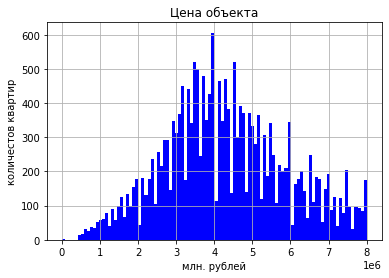

In [47]:
data['last_price'].plot(title = 'Цена объекта', kind = 'hist', bins=100, grid = True,
                        range=(1.219000e+04, 8.000000e+06), color = 'blue')
plt.xlabel('млн. рублей')
plt.ylabel('количестов квартир')
plt.show()

**Вывод:**
По изученным данным можно увидеть, что квартиры с промежутком от 3.4 до 6.8 млн. рублей имеют большее количество публикаций. За 3.8 млн.рублей имеется большее количество выставленных квартир на продажу.

##### Изучим параметр rooms - количество комнат:

In [48]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

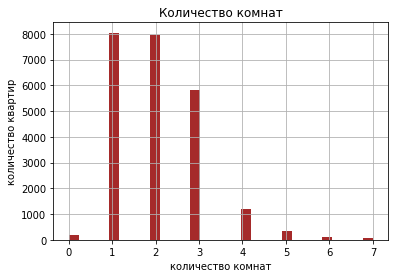

In [49]:
data['rooms'].plot(title = 'Количество комнат', kind = 'hist', bins=30, grid = True,
                        range=(0, 7), color = 'brown')
plt.xlabel('количество комнат')
plt.ylabel('количество квартир')
plt.show()

**Вывод:**
По изученным данным можно увидеть, что квартиры популярной является однокомнатная квартира и убываются по уменьшению комнат.

##### Изучим параметр ceiling_height - высота потолков:

In [50]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [51]:
# Приведем в порядок значения высот, скорее всего данные не в правильном формате (не 2.5 м, а 25 м.) 
# По данным выше видно, что максимальное значение потолков 100 метров, это аномалия
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height']/10

In [52]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.698721
std          0.253208
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

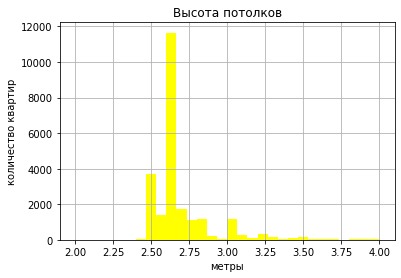

In [53]:
data['ceiling_height'].plot(title = 'Высота потолков', kind = 'hist', bins=30, grid = True,
                        range=(2, 4), color = 'yellow')
plt.xlabel('метры')
plt.ylabel('количество квартир')
plt.show()

**Вывод:**
По изученным данным можно увидеть, что квартиры в среднем имеют высоту потолков - 2.65 метра. После 2.50 метра, 2.70, 2.60, 2.80, 2.75.

##### Изучим параметр floor_type -  тип этажа квартиры («первый», «последний», «другой»):

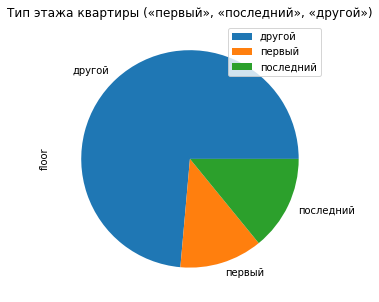

In [54]:
data.pivot_table(index='floor_type', values = 'floor', aggfunc = 'count') \
  .plot.pie(y= 'floor', figsize=(5,5), title = 'Тип этажа квартиры («первый», «последний», «другой»)')
plt.show()

**Вывод:**
По изученным данным можно увидеть, что квартиры на первом и последнем этажах не пользуются спросом, около 25% хотят продать данные квартиры.

##### Изучим параметр floors_total -  общее количество этажей в доме:

In [55]:
data['floors_total'].describe()

count    23699.000000
mean        10.667750
std          6.585961
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

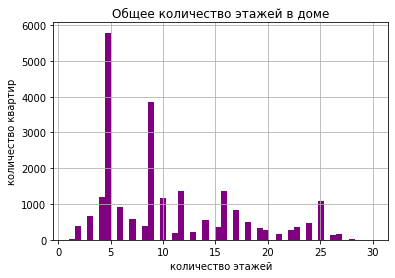

In [56]:
data['floors_total'].plot(title = 'Общее количество этажей в доме', kind = 'hist', bins=50, grid = True,
                        range=(1, 30), color = 'Purple')
plt.xlabel('количество этажей')
plt.ylabel('количество квартир')
plt.show()

**Вывод:**
По изученным данным можно увидеть, что пятиэтажные квартиры продаются чаще всего, далее идут девятиэтажки.

##### Изучим параметр city_сenters_nearest -  расстояние до центра города в метрах:

In [57]:
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

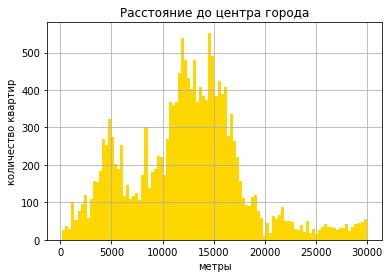

In [58]:
data['city_centers_nearest'].plot(title = 'Расстояние до центра города', kind = 'hist', bins=100, grid = True,
                        range=(181, 30000), color = 'Gold')
plt.xlabel('метры')
plt.ylabel('количество квартир')
plt.show()

**Вывод:**
По изученным данным можно увидеть, что квартиры от 12000 до 17000 метров от центра города являются популярные в публикации. Также около 5000 метров тоже набирают спрос в продажах. Максимальным является 15000 метров.

##### Изучим параметр parks_nearest - расстояние до ближайшего парка:

In [59]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

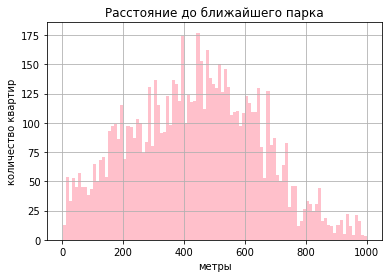

In [60]:
data['parks_nearest'].plot(title = 'Расстояние до ближайшего парка', kind = 'hist', bins=100, grid = True,
                        range=(1, 1000), color = 'pink')
plt.xlabel('метры')
plt.ylabel('количество квартир')
plt.show()

**Вывод:**
По изученным данным можно увидеть, что квартиры от 200 до 700 метров от ближайшего парка являются популярные в публикации. Максимальным является 450 метров. Данные находятся не в сильном разбросе, поэтому выбор покупки квартир не сильно привязан к расстоянию парков.

**Промежуточный вывод по изученным выше параметрам:**
<p></p>

<div style="border:solid green 2px; padding: 10px">

1. Большинство квартир с общей площадью от 40 до 69 кв. метров имеют большее количество публикаций, с площадью 52 кв. метра максимальное количество.   
2. Квартиры с жилой площадью около 18 и 30 кв. метров имеют большее количество публикаций, около 24 кв. метров имеется спад. Квартиры с 18 кв. метров имеют максимальное количество публикаций.
3. Квартиры с площадью кухни в порядке убывания - 6, 10, 7, 8, 9, 11, 12 кв. метров имеют спрос на предложение. 
4. Квартиры с промежутком от 3.4 до 6.8 млн. рублей имеют большее количество публикаций. За 3.8 млн.рублей имеется большее количество выставленных квартир на продажу.
5. Квартиры в среднем имеют высоту потолков - 2.65 метра. После 2.50 метра, 2.70, 2.60, 2.80, 2.75.
6. Квартиры на первом и последнем этажах не пользуются спросом, около 25% хотят продать данные квартиры.
7. Квартиры популярной является однокомнатная квартира и убываются по уменьшению комнат. 
8. Пятиэтажные квартиры продаются чаще всего, далее идут девятиэтажки. 
9. Квартиры от 12000 до 17000 метров от центра города являются популярные в публикации. Также около 5000 метров тоже набирают спрос в продажах. Максимальным является 15000 метров.
10. Квартиры от 200 до 700 метров от ближайшего парка являются популярные в публикации. Максимальным является 450 метров. Данные находятся не в сильном разбросе, поэтому выбор покупки квартир не сильно привязан к расстоянию парков.
    
</div>

#### Изучим, как быстро продавались квартиры (столбец days_exposition).

In [61]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

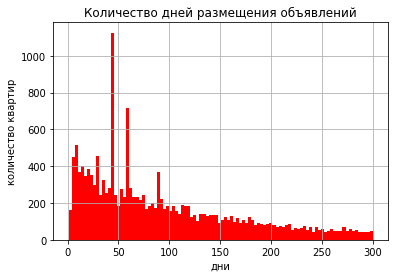

In [62]:
data['days_exposition'].plot(title = 'Количество дней размещения объявлений', kind = 'hist', bins=100, grid = True,
                        range=(1, 300), color = 'red')
plt.xlabel('дни')
plt.ylabel('количество квартир')
plt.show()

**Вывод:**
По изученным данным можно увидеть, что большинство квартир продавалось за 45 дней. После 232 дней квартиры продавались значительно долго и максимальным значением является 1580 дней, возможно квартиры так и не продались.  В среднем квартиры продавались за 180 дней, а по медианному значению за 95 дней. Медианное значение считается достоверным, так как не зависит от выбросов и других факторов. 

#### Изучим, зависит ли цена от: общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год).

##### Изучим, зависит ли цена от общей площади:

In [63]:
# Проверим связь между двумя этими параметрами
data['last_price'].corr(data['total_area'])

0.6536750579657242

<AxesSubplot:>

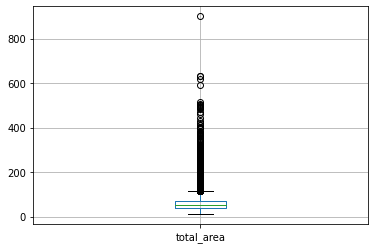

In [64]:
# Связь недостаточно сильная, посмотрим на boxplot есть ли выбросы:
data.boxplot('total_area')

(11.0, 118.0)

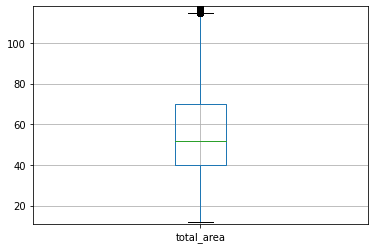

In [65]:
# Ограничим примерно от 11 до 118, чтобы убрать выбросы и посмотреть boxplot без них:
data.boxplot('total_area')
plt.ylim(11,118)

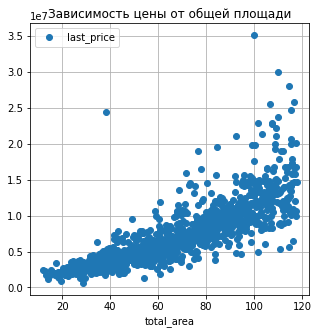

In [66]:
data.query('11 < total_area < 118').pivot_table(index='total_area', values='last_price').plot(grid=True, 
                                                                                              style='o', figsize=(5, 5))
plt.title('Зависимость цены от общей площади')
plt.show()

**Вывод:**
По изученным данным можно увидеть, что коэффициент корреляции составляет 0.65, после обработки данных, отбросив выбросы, построив boxplot и график, можно увидеть, что есть прямая зависимость цены от общей площади, с увеличением площади цена будет расти.

##### Изучим, зависит ли цена от жилой площади:

In [67]:
# Проверим связь между двумя этими параметрами
data['last_price'].corr(data['living_area'])

0.5664915336952651

<AxesSubplot:>

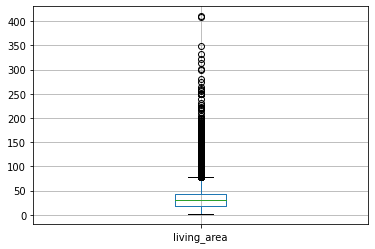

In [68]:
# Связь есть, но небольшая, посмотрим на boxplot есть ли выбросы:
data.boxplot('living_area')

(1.0, 80.0)

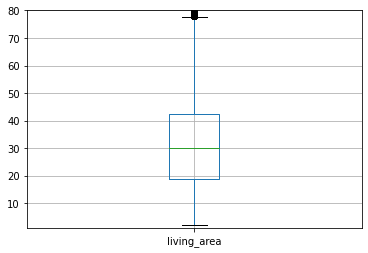

In [69]:
# Ограничим примерно от 1 до 80, чтобы убрать выбросы и посмотреть boxplot без них:
data.boxplot('living_area')
plt.ylim(1, 80)

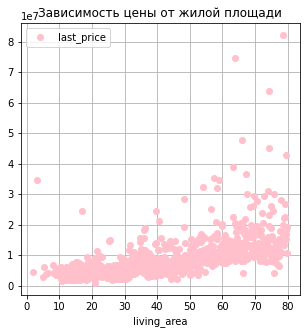

In [70]:
data.query('1 < living_area < 80').pivot_table(index='living_area', values='last_price').plot(grid=True, 
    style='o', figsize=(5, 5), color = 'pink')
plt.title('Зависимость цены от жилой площади')
plt.show()

**Вывод:**
По изученным данным можно увидеть, что коэффициент корреляции составляет 0.56, после обработки данных, отбросив выбросы, построив boxplot и график, можно увидеть, что есть прямая зависимость цены от жилой площади, но меньше, чем у общей площади, с увеличением жилой площади цена будет расти.  

##### Изучим, зависит ли цена от площади кухни:

In [71]:
# Проверим связь между двумя этими параметрами
data['last_price'].corr(data['kitchen_area'])

0.3864437841938422

<AxesSubplot:>

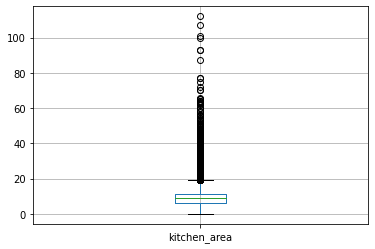

In [72]:
# Связь очень слабая, посмотрим на boxplot есть ли выбросы:
data.boxplot('kitchen_area')

(0.0, 20.0)

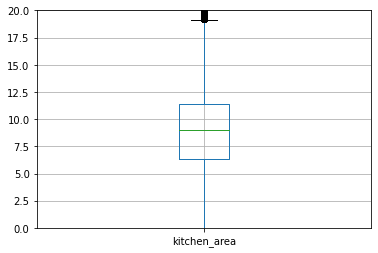

In [73]:
# Ограничим примерно от 0 до 20, чтобы убрать выбросы и посмотреть boxplot без них:
data.boxplot('kitchen_area')
plt.ylim(0, 20)

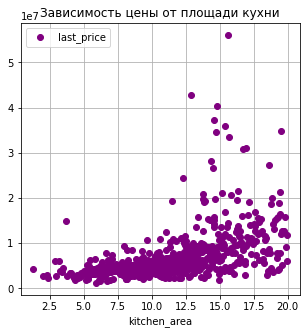

In [74]:
data.query('0 < kitchen_area < 20').pivot_table(index='kitchen_area', values='last_price').plot(grid=True, 
    style='o', figsize=(5, 5), color = 'purple')
plt.title('Зависимость цены от площади кухни')
plt.show()

**Вывод:**
По изученным данным можно увидеть, что коэффициент корреляции составляет 0.39, после обработки данных, отбросив выбросы, построив boxplot и график, можно увидеть, что есть прямая зависимость цены от площади кухни, но очень слабая, с увеличением площади кухни цена будет расти, но это несильно будет влиять на цену квартиры.

##### Изучим, зависит ли цена от количества комнат:

In [75]:
# Проверим связь между двумя этими параметрами
data['last_price'].corr(data['rooms'])

0.3633428499648948

<AxesSubplot:>

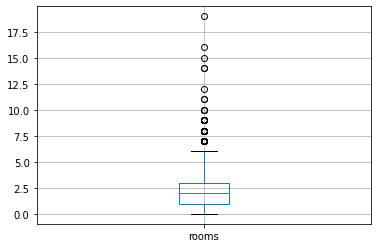

In [76]:
# Связь очень слабая, посмотрим на boxplot есть ли выбросы:
data.boxplot('rooms')

(0.0, 7.0)

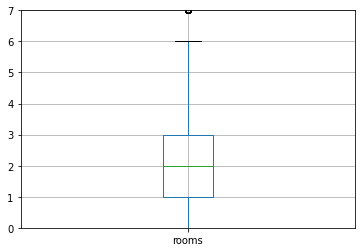

In [77]:
# Ограничим примерно от 0 до 7, чтобы убрать выбросы и посмотреть boxplot без них:
data.boxplot('rooms')
plt.ylim(0, 7)

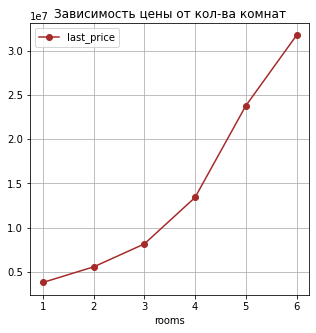

In [78]:
data.query('0 < rooms < 7').pivot_table(index='rooms', values='last_price').plot(grid=True, 
    style='-o', figsize=(5, 5), color = 'brown')
plt.title('Зависимость цены от кол-ва комнат')
plt.show()

**Вывод:**
По изученным данным можно увидеть, что коэффициент корреляции составляет 0.36, после обработки данных, отбросив выбросы, построив boxplot и график, можно увидеть, что по графику есть прямая зависимость цены от количество комнат, с увеличением количества комнат цена будет расти. Коэффициент корреляции слабый, так как имеются выбросы (есть квартиры без комнат(студия) и есть квартиры с большим количеством комнат, как единицы).

##### Изучим, зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой):

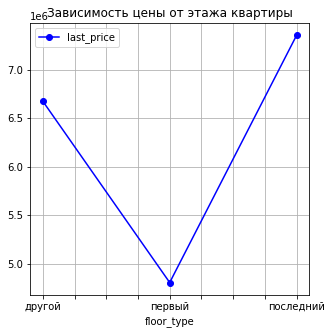

In [79]:
# Построим график для изучении зависимости этих параметров:
data.pivot_table(index='floor_type', values='last_price').plot(grid=True, style='-o', figsize=(5, 5), color = 'blue')
plt.title('Зависимость цены от этажа квартиры')
plt.show()

**Вывод:**
По графику видно, что квартира, расположенная на последнем этаже стоит дороже, чем на другом этаже, а вот квартира на первом этаже сильно дешевле.

##### Изучим, зависит ли цена от даты размещения (день недели, месяц, год):

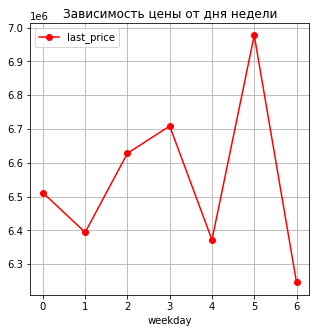

In [80]:
# Построим график для изучении зависимости этих параметров:
data.pivot_table(index='weekday', values='last_price').plot(grid=True, style='-o', figsize=(5,5), color = 'red')
plt.title('Зависимость цены от дня недели')
plt.show()

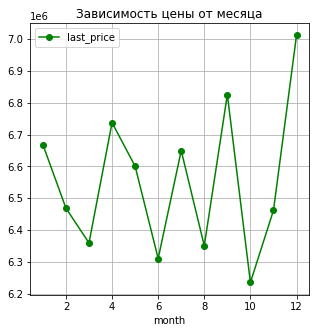

In [81]:
# Построим график для изучении зависимости этих параметров:
data.pivot_table(index='month', values='last_price').plot(grid=True, style='-o', figsize=(5,5), color = 'green')
plt.title('Зависимость цены от месяца')
plt.show()

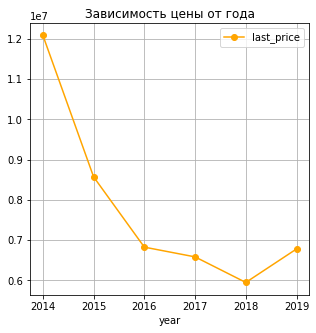

In [82]:
# Построим график для изучении зависимости этих параметров:
data.pivot_table(index='year', values='last_price').plot(grid=True, style='-o', figsize=(5,5), color = 'orange')
plt.title('Зависимость цены от года')
plt.show()

**Вывод:**
По графикам видно, что кватиры, опубликованные с 2014 года снижались в цене до 2018 года и чуть поднялись в цене 2019 году. Самый дорогой месяц  - это декабрь, после сентябрь, июль, апрель и январь. В субботу выкладывались самые дорогие квартиры. Прямой зависимости от даты размещения невыявлено.

**Промежуточный вывод по изученным выше параметрам:**
<p></p>

<div style="border:solid green 2px; padding: 10px">

1.  С увеличением общей площади цена будет расти. У этих двух параметров самая высокая корреляция.
2. Зависимость цены от жилой площади есть, но меньше, чем у общей площади, с увеличением жилой площади цена будет расти. 
3. Есть прямая зависимость цены от площади кухни, но очень слабая, с увеличением площади кухни цена будет расти, но это несильно будет влиять на цену квартиры.
4. Есть прямая зависимость цены от количество комнат, с увеличением количества комнат цена будет расти. 
5. Квартира, расположенная на последнем этаже стоит дороже, чем на другом этаже, а вот квартира на первом этаже сильно дешевле.
6. Прямой зависимости от даты размещения невыявлено.
</div>

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 

In [83]:
largest_number = data.pivot_table(index='locality_name', values='price_of_one_square_meter', aggfunc=['count'])
largest_number.columns = ['count']
largest_number = largest_number.sort_values(by='count', ascending=False).head(10)
largest_number['price_of_one_square_meter'] = data.pivot_table(index='locality_name', values='price_of_one_square_meter')
largest_number.sort_values(by='price_of_one_square_meter', ascending=False).round(2)

,count,price_of_one_square_meter
locality_name,,
санкт-петербург,15721,114849.01
пушкин,369,103125.82
кудрово,472,95324.93
парголово,327,90175.91
мурино,590,86087.51
шушары,440,78677.36
колпино,338,75424.58
гатчина,307,68746.15
всеволожск,398,68654.47


**Вывод:**
<p></p>

<div style="border:solid green 2px; padding: 10px">
Наибольшая средняя стоимость одного квадратного метра у города Санкт-Петербург - 114849.01 кв.м, далее идут город Пушкин, Кудрово, Парголово, Мурино, Шушары, Колпино, Гатчина и Всеволожск. Самая низкая средняя стоимость у города Выборга - 58141.91 кв.м.

</div>

#### Вычислим  среднюю стоимость квартиры в Санкт-Петербурге на разном удалении от центра.

In [84]:
distance_SPB = data.query('locality_name == "санкт-петербург"').pivot_table(index='distance',
                                                                            values='last_price', aggfunc='mean')
distance_SPB.head(10)

,last_price
distance,
0.0,3.144912e+07
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.112658e+07
4.0,1.330428e+07
5.0,1.449912e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.957717e+06


In [ ]:
data.query('locality_name == "санкт-петербург"').pivot_table(index='distance', values='last_price').plot(grid=True, 
    style='-o', figsize=(5,5), color = 'orange')
plt.title('Средняя цена от удаления от центра')

Text(0.5, 1.0, 'Средняя цена от удаления от центра')

**Вывод:**
<p></p>

<div style="border:solid green 2px; padding: 10px">
С удалением от центра города на каждый километр, цена квартиры уменьшается. В районе 4 - 6 км идет небольшое поднятие цены, далее опять цена уменьшается. Есть всплеск на 27 км, вероятней всего какой-то один дорогостоящий объект.

</div>

### Напишем общий вывод

**Общий вывод:**
<p></p>

<div style="border:solid green 3px; padding: 10px">
    
**1. Изучили общую информацию:**
- Таблица состоит из 23699 записей.
- Явных дубликатов не найдено.
- Обнаружены пропуски.
- Есть некорректные типы данных
- По гистограммам видно, что есть аномальные значения.
    
**2. Выполнили предобработку данных:**   
- Переименовали столбец cityCenters_nearest в city_centers_nearest.
- Заменили пропуски в таблице на логические значения.
- Устранили неявные дубликаты у столбца locality_name.
- Заменили некорректные типы данных на корректные.
    
**3. Добавили новые столбцы:**
- **price_of_one_square_meter** - цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
- **weekday** - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- **month** - месяц публикации объявления;
- **year** - год публикации объявления;
- **floor_type** - тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- **distance** - расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).
    
**4. Провели исследовательский анализ данных:**
    
- *Изучили перечисленные ниже параметры объектов:*
    
    - Большинство квартир с общей площадью от 40 до 69 кв. метров имеют большее количество публикаций, с площадью 52 кв. метра максимальное количество. 

    - Квартиры с жилой площадью около 18 и 30 кв. метров имеют большее количество публикаций, около 24 кв. метров имеется спад. Квартиры с 18 кв. метров имеют максимальное количество публикаций. 
    - Квартиры с площадью кухни в порядке убывания - 6, 10, 7, 8, 9, 11, 12 кв. метров имеют спрос на предложение. 
    - Квартиры с промежутком от 3.4 до 6.8 млн. рублей имеют большее количество публикаций. За 3.8 млн.рублей имеется большее количество выставленных квартир на продажу.
    - Квартиры в среднем имеют высоту потолков - 2.65 метра. После 2.50 метра, 2.70, 2.60, 2.80, 2.75.
    - Квартиры на первом и последнем этажах не пользуются спросом, около 25% хотят продать данные квартиры. 
    - Квартиры популярной является однокомнатная квартира и убываются по уменьшению комнат. 
    - Пятиэтажные квартиры продаются чаще всего, далее идут девятиэтажки. 
    - Квартиры от 12000 до 17000 метров от центра города являются популярные в публикации. Также около 5000 метров тоже набирают спрос в продажах. Максимальным является 15000 метров.
    - Квартиры от 200 до 700 метров от ближайшего парка являются популярные в публикации. Максимальным является 450 метров. Данные находятся не в сильном разбросе, поэтому выбор покупки квартир не сильно привязан к расстоянию парков.
    
    
- *Изучили, как быстро продавались квартиры:*
    
    - По изученным данным можно увидеть, что большинство квартир продавалось за 45 дней. После 232 дней квартиры продавались значительно долго и максимальным значением является 1580 дней, возможно квартиры так и не продались.  В среднем квартиры продавались за 180 дней, а по медианному значению за 95 дней. Медианное значение считается достоверным, так как не зависит от выбросов и других факторов. 
    
    
- *Определили факторы, которые больше всего влияют на общую (полную) стоимость объекта:* 
    -  С увеличением общей площади цена будет расти. У этих двух параметров самая высокая корреляция.
    - Зависимость цены от жилой площади есть, но меньше, чем у общей площади, с увеличением жилой площади цена будет расти. 
    - Есть прямая зависимость цены от площади кухни, но очень слабая, с увеличением площади кухни цена будет расти, но это несильно будет влиять на цену квартиры.
    - Есть прямая зависимость цены от количество комнат, с увеличением количества комнат цена будет расти. 
    - Квартира, расположенная на последнем этаже стоит дороже, чем на другом этаже, а вот квартира на первом этаже сильно дешевле.
    - Прямой зависимости от даты размещения невыявлено.
    
    
- *Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:*
    - Наибольшая средняя стоимость одного квадратного метра у города Санкт-Петербург - 114849.01 кв.м, далее идут город Пушкин, Кудрово, Парголово, Мурино, Шушары, Колпино, Гатчина и Всеволожск. Самая низкая средняя стоимость у города Выборга - 58141.91 кв.м.
    
    
- *Вычислили среднюю стоимость квартиры на разном удалении от центра Санкт-Петербурга:*
    
   - С удалением от центра города на каждый километр, цена квартиры уменьшается. В районе 4 - 6 км идет небольшое поднятие цены, далее опять цена уменьшается.  Есть всплеск на 27 км, вероятней всего какой-то один дорогостоящий объект. В центре города квартира стоит 31 449 120 миллионов рублей.   
    
    

</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.